<a href="https://colab.research.google.com/github/anabeatrizzdm/HREmployeeAttrition/blob/main/projetohr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

# Caminho do arquivo no Drive
file_path = "/content/drive/MyDrive/Colab Notebooks/WA_Fn-UseC_-HR-Employee-Attrition.csv"

# Carrega o dataset
df = pd.read_csv(file_path)

# Visualiza as 5 primeiras linhas
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# Verificar valores ausentes
print(df.isnull().sum())

# Remover linhas duplicadas, se houver
df.drop_duplicates(inplace=True)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

🔹 Converter variáveis categóricas em numéricas

In [5]:
from sklearn.preprocessing import LabelEncoder

# Codifica colunas binárias
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])  # Yes=1, No=0
df['OverTime'] = le.fit_transform(df['OverTime'])

# Cria dummies (OneHotEncoding) para colunas com múltiplas categorias
df = pd.get_dummies(df, columns=['Department', 'JobRole', 'EducationField', 'BusinessTravel'], drop_first=True)


Normalizar variáveis numéricas

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'DistanceFromHome']

df[num_cols] = scaler.fit_transform(df[num_cols])

Separar dados de treino e teste

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)



Tamanho do conjunto de treino: (1176, 47)
Tamanho do conjunto de teste: (294, 47)


In [8]:
X_train.select_dtypes(include=['object']).columns

Index(['Gender', 'MaritalStatus', 'Over18'], dtype='object')

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Pega as colunas do tipo "object"
cols_obj = X_train.select_dtypes(include=['object']).columns

for col in cols_obj:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

In [10]:
X_train.dtypes

,0
Age,float64
DailyRate,int64
DistanceFromHome,float64
Education,int64
EmployeeCount,int64
EmployeeNumber,int64
EnvironmentSatisfaction,int64
Gender,int64
HourlyRate,int64
JobInvolvement,int64


Importar as bibliotecas necessárias

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

Treinar o modelo de Regressão Logística

In [12]:
# Criação e treino do modelo
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

# Predições
y_pred_log = log_model.predict(X_test)

# Avaliação
print("🔹 Regressão Logística:")
print("Acurácia:", accuracy_score(y_test, y_pred_log))
print("AUC:", roc_auc_score(y_test, y_pred_log))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_log))


🔹 Regressão Logística:
Acurácia: 0.8945578231292517
AUC: 0.6677224736048265

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       255
           1       0.70      0.36      0.47        39

    accuracy                           0.89       294
   macro avg       0.80      0.67      0.71       294
weighted avg       0.88      0.89      0.88       294



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Treinar o modelo Random Forest

In [13]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("🔹 Random Forest:")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("AUC:", roc_auc_score(y_test, y_pred_rf))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_rf))


🔹 Random Forest:
Acurácia: 0.8741496598639455
AUC: 0.5473604826546004

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.67      0.10      0.18        39

    accuracy                           0.87       294
   macro avg       0.77      0.55      0.55       294
weighted avg       0.85      0.87      0.83       294



Matriz de confusão

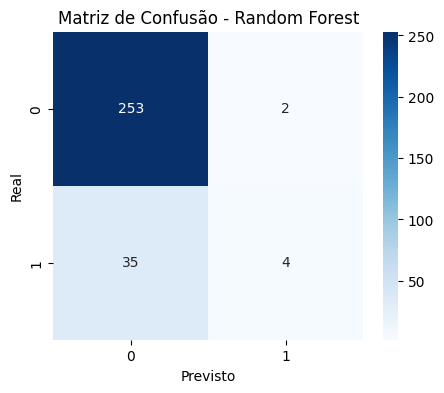

In [14]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()


Importância das variáveis

Para entender quais fatores mais influenciam na saída dos funcionários:

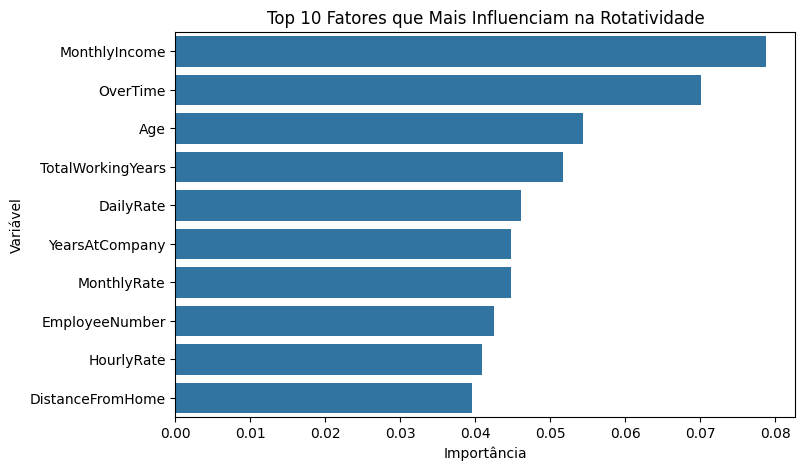

In [15]:
importances = pd.DataFrame({
    'Variável': X_train.columns,
    'Importância': rf_model.feature_importances_
}).sort_values(by='Importância', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importância', y='Variável', data=importances.head(10))
plt.title("Top 10 Fatores que Mais Influenciam na Rotatividade")
plt.show()
